# **Topic :- Suitable Package and Portfolio Prediction through Employee Productivity Analysis using Machine Learning**









##### Importing all the necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MultiLabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

##### Importing the dataset in dataframe

In [ ]:
df_orig = pd.read_csv("/content/employee_dataset.csv")
df = df_orig

In [ ]:
df.head()

,EmployeeID,Name,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,JoiningDate,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,ManagerID
0,E07397,Kelly Smith,21.0,Female,Finance,Junior,0.0,"Finance, Excel",26918.0,65.0,31-12-2022,Delhi,Bachelor,No,4.0,2022.0,E08338
1,E05254,Patrick Baker,38.0,Male,Sales,Junior,3.0,"CRM, Negotiation",30960.0,58.0,02-09-2022,Bangalore,Master,No,3.0,2025.0,E06960
2,E05764,Karen Black,37.0,Female,HR,Junior,1.0,"Communication, Recruitment",30858.0,54.0,01-10-2019,Kolkata,Master,No,3.0,2019.0,E05239
3,E10000,Mary Lozano,29.0,Male,IT,Executive,6.0,"SQL, Cloud Computing",43634.0,53.0,05-05-2014,Bangalore,Bachelor,Yes,3.0,2019.0,E01416
4,E09321,Cory Smith,27.0,Female,Finance,Junior,1.0,"Excel, Finance",33096.0,43.0,07-11-2022,Pune,PhD,No,3.0,2022.0,E02520


In [ ]:
df.shape

(8358, 17)

In [ ]:
df.columns

Index(['EmployeeID', 'Name', 'Age', 'Gender', 'Department', 'Designation',
       'ExperienceYears', 'Skillset', 'Salary', 'ProductivityScore',
       'JoiningDate', 'WorkLocation', 'EducationLevel', 'RemoteWorkEligible',
       'PerformanceRating', 'LastPromotionYear', 'ManagerID'],
      dtype='object')

## **Data-preprocessing**



#### Data cleaning

###### Drop column's

In [ ]:
# dropping identifier or non-informative columns like id,name,date for cleaner analysis
df.drop(columns=["ManagerID","JoiningDate","EmployeeID","Name"],inplace=True)
df.shape

(8358, 13)

In [ ]:
# Observing features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8344 non-null   float64
 1   Gender              8337 non-null   object 
 2   Department          8329 non-null   object 
 3   Designation         8340 non-null   object 
 4   ExperienceYears     8339 non-null   float64
 5   Skillset            8338 non-null   object 
 6   Salary              8331 non-null   float64
 7   ProductivityScore   8340 non-null   float64
 8   WorkLocation        8349 non-null   object 
 9   EducationLevel      8343 non-null   object 
 10  RemoteWorkEligible  8342 non-null   object 
 11  PerformanceRating   8337 non-null   float64
 12  LastPromotionYear   8346 non-null   float64
dtypes: float64(6), object(7)
memory usage: 849.0+ KB


In [ ]:
## stastical analysis for all numerical feature
df.describe()

,Age,ExperienceYears,Salary,ProductivityScore,PerformanceRating,LastPromotionYear
count,8344.000000,8339.000000,8331.000000,8340.000000,8337.000000,8346.000000
mean,31.656520,5.347883,52608.213660,66.276379,3.828955,2020.329140
std,6.591427,5.059063,26189.162402,13.413100,0.713027,4.542099
min,21.000000,0.000000,25000.000000,25.000000,2.000000,2010.000000
25%,27.000000,1.000000,32235.500000,57.000000,3.000000,2017.000000
50%,31.000000,4.000000,37922.000000,66.000000,4.000000,2021.000000
75%,36.000000,8.000000,66490.000000,75.000000,4.000000,2025.000000
max,60.000000,30.000000,137180.000000,100.000000,5.000000,2025.000000


###### Drop duplicated row

In [ ]:
# Checking dupicate row in the dataset
df.duplicated().sum()

np.int64(9)

In [ ]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)

Null Value's Removal

In [ ]:
# Checking number of missing values in each column
df.isnull().sum()

,0
Age,14
Gender,21
Department,29
Designation,18
ExperienceYears,19
Skillset,20
Salary,27
ProductivityScore,18
WorkLocation,9
EducationLevel,15


In [ ]:
# Splitting columns by datatype
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define imputers
num_imputer = SimpleImputer(strategy='mean')         # numeric → mean
cat_imputer = SimpleImputer(strategy='most_frequent') # categorical → mode

# Apply imputers to the dataset
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [ ]:
# Checking number of missing values in each column
df.isnull().sum()

,0
Age,0
Gender,0
Department,0
Designation,0
ExperienceYears,0
Skillset,0
Salary,0
ProductivityScore,0
WorkLocation,0
EducationLevel,0


In [ ]:
df.head()

,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear
0,21.0,Female,Finance,Junior,0.0,"Finance, Excel",26918.0,65.0,Delhi,Bachelor,No,4.0,2022.0
1,38.0,Male,Sales,Junior,3.0,"CRM, Negotiation",30960.0,58.0,Bangalore,Master,No,3.0,2025.0
2,37.0,Female,HR,Junior,1.0,"Communication, Recruitment",30858.0,54.0,Kolkata,Master,No,3.0,2019.0
3,29.0,Male,IT,Executive,6.0,"SQL, Cloud Computing",43634.0,53.0,Bangalore,Bachelor,Yes,3.0,2019.0
4,27.0,Female,Finance,Junior,1.0,"Excel, Finance",33096.0,43.0,Pune,PhD,No,3.0,2022.0


In [ ]:
df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]] = df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]].astype(int)

Outlier Detection

In [ ]:
# Selecting only numeric columns from the dataset
num_col = df.select_dtypes(include="number").columns
print(num_col)

Index(['Age', 'ExperienceYears', 'Salary', 'ProductivityScore',
       'PerformanceRating', 'LastPromotionYear'],
      dtype='object')


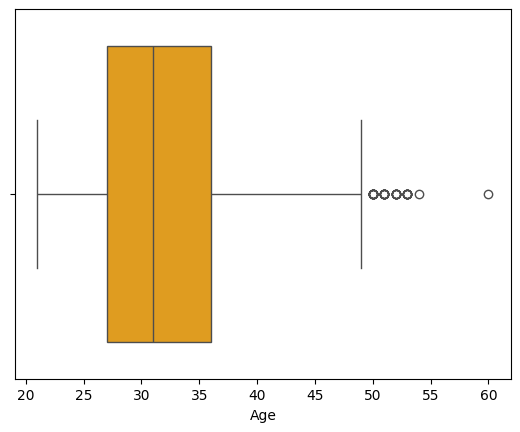

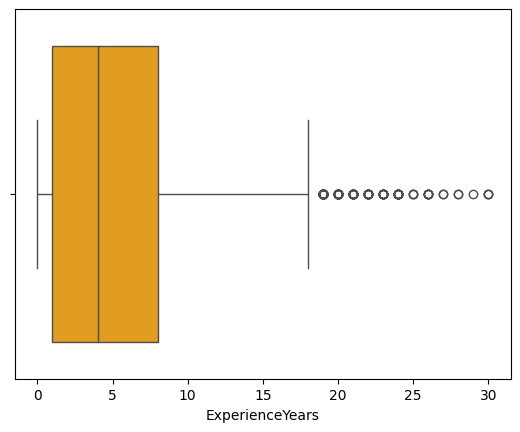

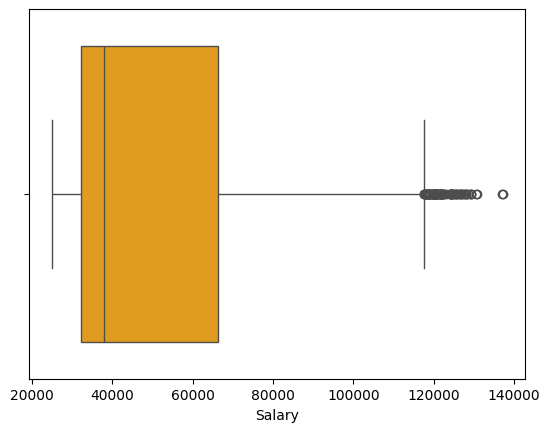

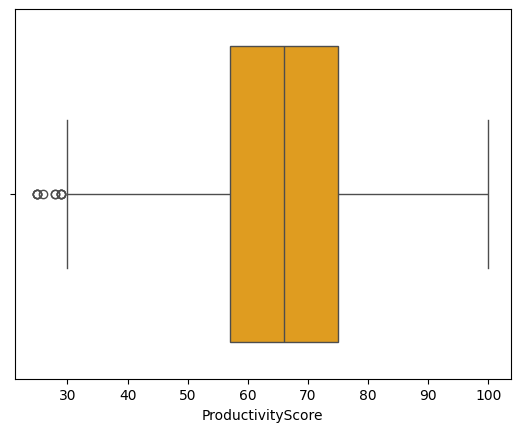

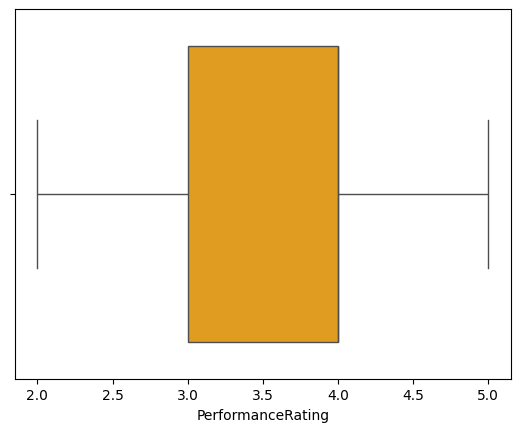

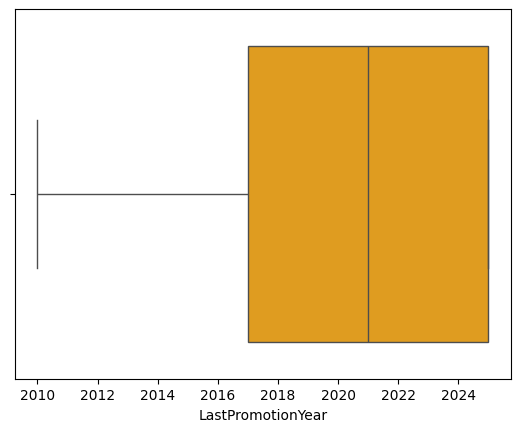

In [ ]:
# Plotting boxplots for all numeric columns
for col in num_col:
    sns.boxplot(x = df[col],color='orange')
    plt.show()

###### The boxplots above show the distribution of the numerical features in the employee dataset : Age, ExperienceYears, Salary, ProductivityScore, PerformanceRating, and LastPromotionYear.



*   Age :- The age distribution is fairly concentrated between the mid-20s and late-30s, with a few employees extending into higher age groups. Some outliers represent unusually young or older employees compared to the majority.

* ExperienceYears :- Majority have under 10 years experience; some highly experienced outliers are present.  

* Salary :- Salary with most employees earning in the lower-to-mid range. A few employees have very high salaries, visible as outliers.

* ProductivityScore :- The scores values lies in the middle, showing that most employees perform within a similar band. However, some lower and higher outliers indicate variations in performance levels.

* PerformanceRating :- Ratings are mostly between 2 to 4 with minimal variation and no major outliers.

* LastPromotionYear: Promotions are recent for most employees, with little significant outliers.









In [ ]:
# Counting outliers in each numeric column using IQR
for col in num_col:
    count = 0
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    for i in range(df[col].shape[0]):
        if df[col].iloc[i] < lower or df[col].iloc[i] > upper:
            count += 1

    print(f"{col} Outlier Value :",count)

Age Outlier Value : 43
ExperienceYears Outlier Value : 165
Salary Outlier Value : 89
ProductivityScore Outlier Value : 11
PerformanceRating Outlier Value : 0
LastPromotionYear Outlier Value : 0


In [ ]:
# # Removing outliers from all numeric columns at once using IQR
# for col in num_col:
#       # Calculate Q1, Q3, and IQR only for each columns
#     Q1 = df[col].quantile(0.30)
#     Q3 = df[col].quantile(0.70)
#     IQR = Q3 - Q1

#       # Define lower and upper bounds
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     # Keep only rows where the column value is within the IQR range
#     df = df[(df[col] >= lower) & (df[col] <= upper)]


In [ ]:
# # Plotting boxplots again after outlier removal to verify cleaner distributions
# for col in num_col:
#     sns.boxplot(x = df[col])
#     plt.show()

EDA

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Display correlation matrix
print(corr)

                        Age  ExperienceYears    Salary  ProductivityScore  \
Age                1.000000         0.647103  0.587130           0.359409   
ExperienceYears    0.647103         1.000000  0.917102           0.564687   
Salary             0.587130         0.917102  1.000000           0.644738   
ProductivityScore  0.359409         0.564687  0.644738           1.000000   
PerformanceRating  0.325776         0.518135  0.589699           0.911088   
LastPromotionYear  0.373415         0.561819  0.526931           0.339041   

                   PerformanceRating  LastPromotionYear  
Age                         0.325776           0.373415  
ExperienceYears             0.518135           0.561819  
Salary                      0.589699           0.526931  
ProductivityScore           0.911088           0.339041  
PerformanceRating           1.000000           0.311297  
LastPromotionYear           0.311297           1.000000  


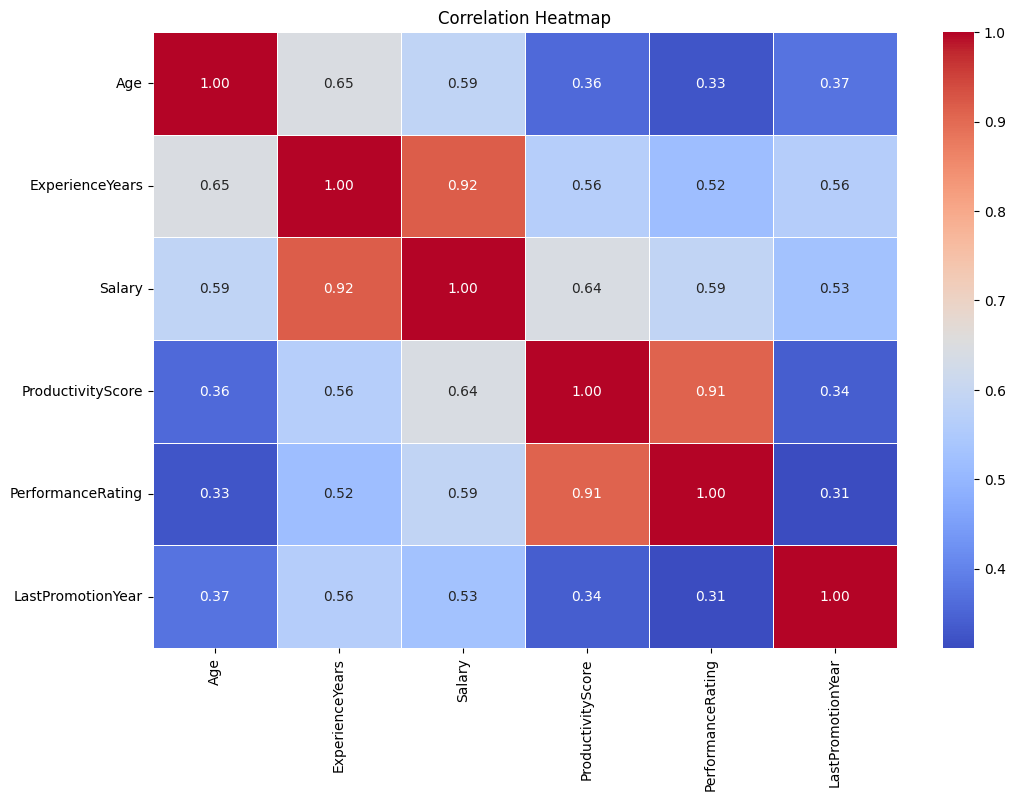

In [ ]:
#Plotting heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows how numeric features in the dataset are related.

   1   -> strong positive correlation (features increase together)

  -1   -> strong negative correlation (one increases, the other decreases)
  
   0   -> little or no linear relationship


This helps identify:
   - Features strongly related to the target variable (important for prediction)
   - Highly correlated features among themselves (may lead to multicollinearity)
Heatmap visualization helps to quickly spot these relationships

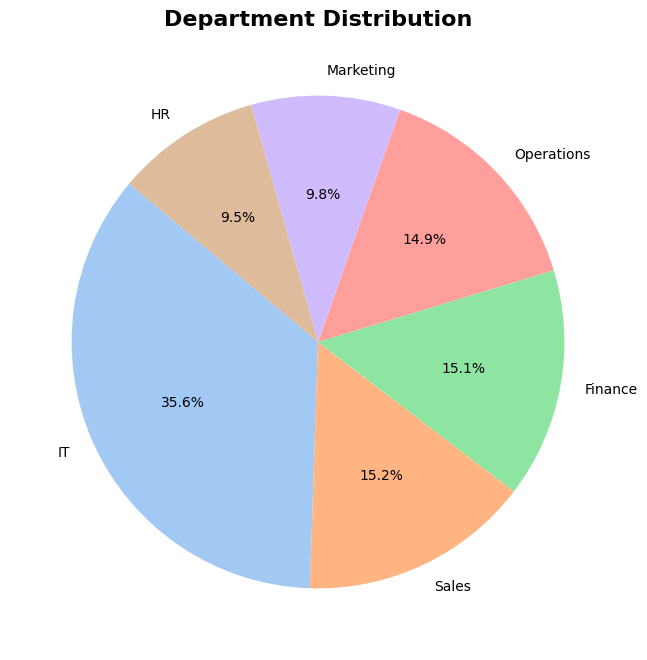

In [ ]:
# Count of each category
category_counts = df['Department'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Department Distribution", fontsize=16, fontweight='bold')
plt.show()

The pie chart illustrates the distribution of employees across different departments. Each slice represents a department, with the size of the slice corresponding to the number of employees in that department.

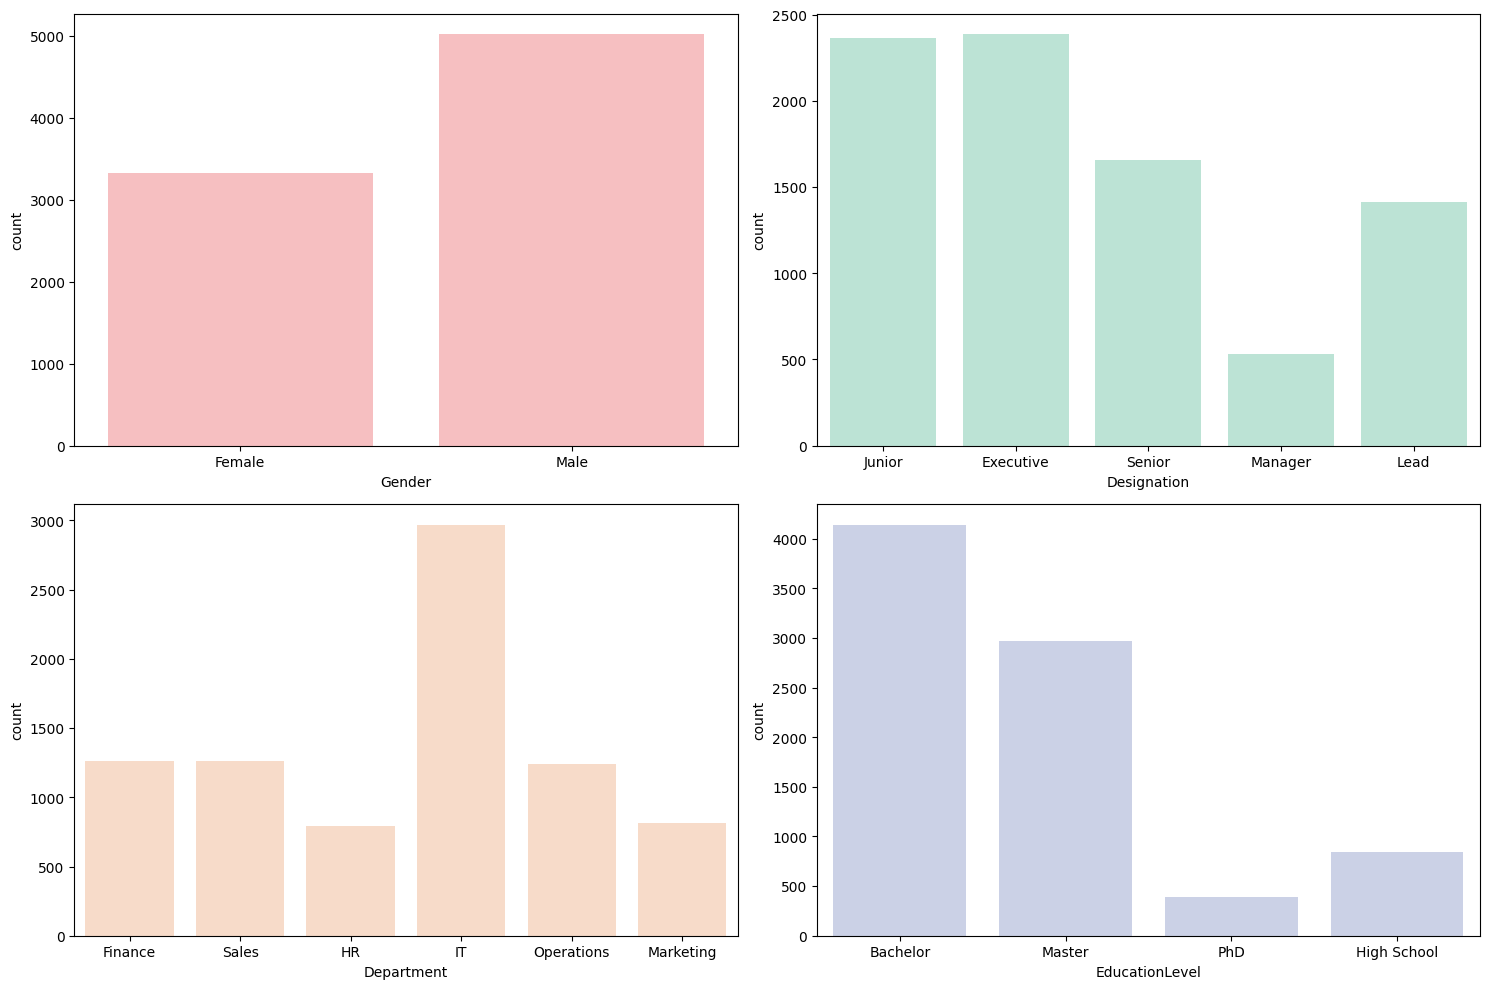

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x="Gender", data=df, color="#FFB6B9")

plt.subplot(2,2,2)
sns.countplot(x="Designation", data=df, color="#B5EAD7")

plt.subplot(2,2,3)
sns.countplot(x="Department", data=df, color="#FFDAC1")

plt.subplot(2,2,4)
sns.countplot(x="EducationLevel", data=df, color="#C7CEEA")

plt.tight_layout()
plt.show()

The countplots above show the distribution of employees across four categorical variables: Gender, Designation, Department, and Education Level.

* Gender:- The dataset has Male employees (5,000) & Female employees (3,500).

* Designation:- Most employees are concentrated in mid-level roles, with relatively fewer at entry-level or senior-level designations.

* Department:- Some departments (e.g., IT, Sales) have much higher representation, while smaller departments have fewer employees, indicating uneven departmental distribution.

* Education Level:- The majority of employees hold undergraduate or postgraduate degrees, while fewer have only a high school education or higher-level qualifications like PhDs.

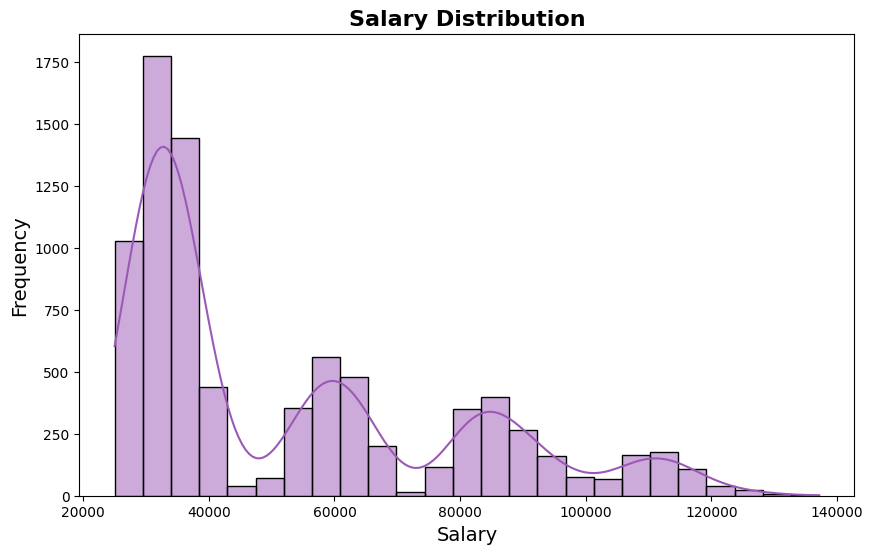

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], kde=True, bins=25, color='#9b59b6')  # Purple color
plt.title("Salary Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Salary", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

Shape of Distribution:- (Right-skewed ) Most employees earn lower salaries, a few earn much higher.

Central Tendency: The peak shows the most common salary range among employees.

Outliers: Bars far from main cluster indicate unusually high or low salaries.


In [ ]:
# Creating the one copy
df1 = df.copy()

Encoding

In [ ]:
# Checking unique categories in selected categorical columns
col_value = ['Gender', 'Department', 'Designation', 'WorkLocation','EducationLevel', 'RemoteWorkEligible']

for col in col_value:
    print(f"{col} : ",df[col].unique())

Gender :  ['Female' 'Male']
Department :  ['Finance' 'Sales' 'HR' 'IT' 'Operations' 'Marketing']
Designation :  ['Junior' 'Executive' 'Senior' 'Manager' 'Lead']
WorkLocation :  ['Delhi' 'Bangalore' 'Kolkata' 'Pune' 'Hyderabad' 'Noida' 'Mumbai'
 'Chennai']
EducationLevel :  ['Bachelor' 'Master' 'PhD' 'High School']
RemoteWorkEligible :  ['No' 'Yes']


In [ ]:
# # Converting categorical values in 'Gender' into numeric (e.g., Male=1, Female=0)
# la = LabelEncoder()
# df['Gender'] = la.fit_transform(df['Gender'])
# # Encode RemoteWorkEligible into binary (Yes=1, No=0)
# df['RemoteWorkEligible'] = la.fit_transform(df['RemoteWorkEligible'])
df["Gender"] = df["Gender"].str.strip().str.lower().map({"male": 1,"female": 0})
df["RemoteWorkEligible"] = df["RemoteWorkEligible"].str.strip().str.lower().map({"yes": 1,"no": 0})

In [ ]:
# Apply Ordinal Encoding based on defined order
Des_cat = ['Junior', 'Executive', 'Lead', 'Senior', 'Manager']
Edu_cat = ['High School', 'Bachelor', 'Master', 'PhD']

oe = OrdinalEncoder(categories=[Des_cat,Edu_cat])

df[["Designation","EducationLevel"]] = oe.fit_transform(df[["Designation","EducationLevel"]])

df[["Designation","EducationLevel"]] = df[["Designation","EducationLevel"]].astype(int)

In [ ]:
oh = OneHotEncoder(drop="first", sparse_output=False, dtype=np.int64)

encoded = oh.fit_transform(df[["WorkLocation", "Department"]])

encoded_df = pd.DataFrame(encoded, columns = oh.get_feature_names_out(["WorkLocation", "Department"]))

df = pd.concat([df.drop(["WorkLocation", "Department"], axis=1).reset_index(drop=True),
                encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
df['Skillset_list'] = df['Skillset'].str.split(', ')
df.head()

,Age,Gender,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,...,WorkLocation_Kolkata,WorkLocation_Mumbai,WorkLocation_Noida,WorkLocation_Pune,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Skillset_list
0,21,0,0,0,"Finance, Excel",26918.0,65,1,0,4,...,0,0,0,0,0,0,0,0,0,"[Finance, Excel]"
1,38,1,0,3,"CRM, Negotiation",30960.0,58,2,0,3,...,0,0,0,0,0,0,0,0,1,"[CRM, Negotiation]"
2,37,0,0,1,"Communication, Recruitment",30858.0,54,2,0,3,...,1,0,0,0,1,0,0,0,0,"[Communication, Recruitment]"
3,29,1,1,6,"SQL, Cloud Computing",43634.0,53,1,1,3,...,0,0,0,0,0,1,0,0,0,"[SQL, Cloud Computing]"
4,27,0,0,1,"Excel, Finance",33096.0,43,3,0,3,...,0,0,0,1,0,0,0,0,0,"[Excel, Finance]"


In [ ]:
mlb = MultiLabelBinarizer()

skill_encoded = mlb.fit_transform(df['Skillset_list'])

skill_df = pd.DataFrame(skill_encoded, columns=mlb.classes_)

# skill_df.head()
df = pd.concat([df, skill_df], axis=1)

df.drop(columns="Skillset_list", inplace=True)
df.drop(columns="Skillset",inplace=True)


In [ ]:
skill_df.shape

(8349, 20)

In [ ]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
1978,40,1,4,13,111363.0,100,0,0,5,2025,...,0,0,0,0,0,0,0,0,0,0
7976,33,1,2,11,82374.0,76,1,1,4,2025,...,0,0,0,0,0,0,0,0,0,1
5311,39,1,1,6,34817.0,46,0,0,3,2025,...,0,1,0,0,0,0,1,0,0,0
5818,30,0,2,8,82268.0,80,2,0,5,2025,...,0,0,0,0,0,0,1,0,0,0
1953,24,0,1,1,33951.0,42,1,0,3,2024,...,1,0,0,0,0,0,0,0,0,0
2822,32,1,3,5,62229.0,70,1,0,4,2018,...,0,0,1,0,0,0,0,0,0,0
1365,25,0,0,1,30970.0,73,2,0,4,2020,...,0,0,0,0,0,0,0,0,0,0
8190,31,0,2,10,87543.0,84,1,0,5,2025,...,0,0,0,0,0,0,0,0,0,0
5585,32,1,2,7,76655.0,87,1,1,5,2021,...,0,0,0,0,0,0,0,0,0,0
6388,39,1,4,16,109496.0,67,1,1,4,2025,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(8349, 42)

In [ ]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
1398,30,1,0,2,36587.0,63,0,0,4,2010,...,0,0,0,1,1,0,0,0,0,0
66,39,1,1,0,25580.0,87,2,0,5,2016,...,0,0,1,0,0,0,0,0,0,0
4734,34,1,3,7,57152.0,72,1,0,4,2023,...,0,0,0,0,0,0,0,1,0,0
3488,50,0,2,17,93470.0,93,0,0,5,2025,...,0,0,0,0,0,0,1,0,0,0
2776,44,1,4,13,105088.0,77,2,0,4,2025,...,0,0,0,0,0,0,0,0,0,0
8114,30,0,0,1,33813.0,64,1,1,4,2024,...,0,1,0,0,0,0,1,0,0,0
3823,35,0,2,9,80292.0,79,1,0,4,2022,...,0,0,0,0,0,0,0,0,0,0
6600,29,1,0,0,26638.0,76,1,1,4,2016,...,0,0,0,0,0,0,0,0,0,1
1244,35,0,3,8,58407.0,68,1,0,4,2019,...,0,0,0,0,0,0,0,0,1,0
1149,21,1,0,0,31194.0,51,2,1,3,2023,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(8349, 42)

In [ ]:
cat_col = df.select_dtypes(include="number").columns
num_col = df.select_dtypes(exclude="number").columns

In [ ]:
df.columns

Index(['Age', 'Gender', 'Designation', 'ExperienceYears', 'Salary',
       'ProductivityScore', 'EducationLevel', 'RemoteWorkEligible',
       'PerformanceRating', 'LastPromotionYear', 'WorkLocation_Chennai',
       'WorkLocation_Delhi', 'WorkLocation_Hyderabad', 'WorkLocation_Kolkata',
       'WorkLocation_Mumbai', 'WorkLocation_Noida', 'WorkLocation_Pune',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Operations', 'Department_Sales', 'Accounting', 'Analytics',
       'C++', 'CRM', 'Cloud Computing', 'Communication', 'Conflict Management',
       'Content Creation', 'Data Analysis', 'Excel', 'Finance', 'Java',
       'Logistics', 'Marketing', 'Negotiation', 'Project Management', 'Python',
       'Recruitment', 'SEO', 'SQL'],
      dtype='object')

# **Regression : Employee Salary Prediction**

In [ ]:
x = df.drop(columns=["Salary","RemoteWorkEligible"]) #input
y = df["Salary"] #output

In [ ]:
# Split dataset into training (80%) and testing (20%) sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize and train Linear Regression model
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error

y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

MSE_lr_train = mean_squared_error(y_train,y_pred_lr_train)
RMSE_lr_train = root_mean_squared_error(y_train,y_pred_lr_train)
MAE_lr_train = mean_absolute_error(y_train,y_pred_lr_train)
r2_score_train = r2_score(y_train,y_pred_lr_train)

print("For Training")
print("MAE  :-",MAE_lr_train)
print("MSE :- ",MSE_lr_train)
print("RMSE  :- ",RMSE_lr_train)
print(f"r2_score :- ",r2_score_train)

MSE_lr_test = mean_squared_error(y_test,y_pred_lr_test)
RMSE_lr_test = root_mean_squared_error(y_test,y_pred_lr_test)
MAE_lr_test = mean_absolute_error(y_test,y_pred_lr_test)
r2_score_test = r2_score(y_test,y_pred_lr_test)

print("\n")
print("For testing :- ")
print("MAE  :-",MAE_lr_test)
print("MSE :- ",MSE_lr_test)
print("RMSE :- ",RMSE_lr_test)
print(f"r2_score :- ",r2_score_test)

For Training
MAE  :- 6610.382936872237
MSE :-  69677379.17079662
RMSE  :-  8347.297716674339
r2_score :-  0.8983439210277329


For testing :- 
MAE  :- 6593.48919145461
MSE :-  67033950.305493385
RMSE :-  8187.426354202728
r2_score :-  0.9007778228222745


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains nearly 90% of the variance in the target variable. The MAE and RMSE values are very similar for training and testing, indicating consistent and reliable predictions. Overall, Linear Regression demonstrates a good balance between accuracy and generalization, making it an effective model for this dataset.

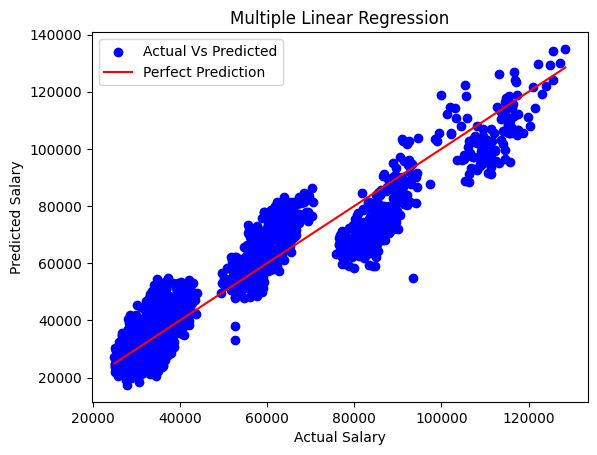

In [ ]:
#plot
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Actual Vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()


2) Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
pl = PolynomialFeatures(degree=2)
X_train_poly = pl.fit_transform(x_train)
X_test_poly = pl.transform(x_test)

# Fit model
poly = LinearRegression()
poly.fit(X_train_poly, y_train)

# Training evaluation
y_pred_poly_train = poly.predict(X_train_poly)

MSE_poly_train = mean_squared_error(y_train, y_pred_poly_train)
RMSE_poly_train = root_mean_squared_error(y_train, y_pred_poly_train)
MAE_poly_train = mean_absolute_error(y_train, y_pred_poly_train)
r2_score_poly_train = r2_score(y_train, y_pred_poly_train)

print("For training :- ")
print("MAE :", MAE_poly_train)
print("MSE :", MSE_poly_train)
print("RMSE :", RMSE_poly_train)
print("r2_score Train :", r2_score_poly_train)

# ---- Testing evaluation ----
y_pred_poly_test = poly.predict(X_test_poly)

MSE_poly_test = mean_squared_error(y_test, y_pred_poly_test)
RMSE_poly_test = root_mean_squared_error(y_test, y_pred_poly_test)
MAE_poly_test = mean_absolute_error(y_test, y_pred_poly_test)
r2_score_poly_test = r2_score(y_test, y_pred_poly_test)

print("\nFor testing :- ")
print("MAE :", MAE_poly_test)
print("MSE :", MSE_poly_test)
print("RMSE :", RMSE_poly_test)
print("r2_score test :", r2_score_poly_test)

For training :- 
MAE : 5828.55574636574
MSE : 56962557.18489719
RMSE : 7547.354316904513
r2_score Train : 0.9168942592192508

For testing :- 
MAE : 6301.175322314827
MSE : 66999184.84355926
RMSE : 8185.302978116281
r2_score test : 0.9008292818935059


The model achieved an R² of 0.91 on training and 0.90 on testing, showing it explains a very large portion of the variance. The MAE and RMSE values are low
and fairly close between training and testing, which indicates consistent performance. Interestingly, the testing R² is only slightly lower than training, suggesting that the model generalizes well without overfitting.

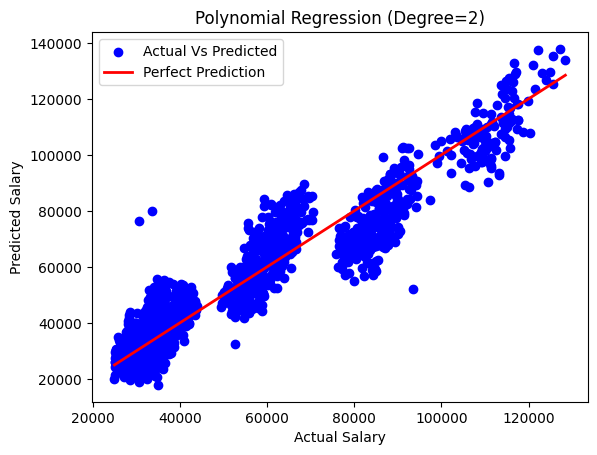

In [ ]:
plt.scatter(y_test, y_pred_poly_test, color='blue', label='Actual Vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()
plt.show()

3) Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV

# Define alpha range and fit RidgeCV
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10,100]
R = RidgeCV(alphas=alphas, cv=5)
R.fit(x_train, y_train)

print("Best alpha for RidgeCV:", R.alpha_)

r_predict_x_train = R.predict(x_train)
r_predict_x_test = R.predict(x_test)

MSE_rid_train = mean_squared_error(y_train, r_predict_x_train)
RMSE_rid_train = np.sqrt(MSE_rid_train)
MAE_rid_train = mean_absolute_error(y_train, r_predict_x_train)
r2_score_rid_train = r2_score(y_train, r_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_rid_train)
print("MSE  :-", MSE_rid_train)
print("RMSE :-", RMSE_rid_train)
print("R2 Score Train :-", r2_score_rid_train)

MSE_rid_test = mean_squared_error(y_test, r_predict_x_test)
RMSE_rid_test = np.sqrt(MSE_rid_test)
MAE_rid_test = mean_absolute_error(y_test, r_predict_x_test)
r2_score_rid_test = r2_score(y_test, r_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_rid_test)
print("MSE  :-", MSE_rid_test)
print("RMSE :-", RMSE_rid_test)
print("R2 Score Test :-", r2_score_rid_test)

Best alpha for RidgeCV: 100.0

For Training :-
MAE  :- 6607.55260715389
MSE  :- 69702908.67639627
RMSE :- 8348.826784428831
R2 Score Train :- 0.8983066746578457

For Testing :-
MAE  :- 6584.047218681262
MSE  :- 66873207.13643008
RMSE :- 8177.603997286129
R2 Score Test :- 0.9010157513216128


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains about 90% of the variance in the data. The MAE and RMSE values are close for train and test, showing the model makes consistent predictions and generalizes well without overfitting. Using RidgeCV, the best alpha was found to be 100.0, which helps balance bias and variance effectively.

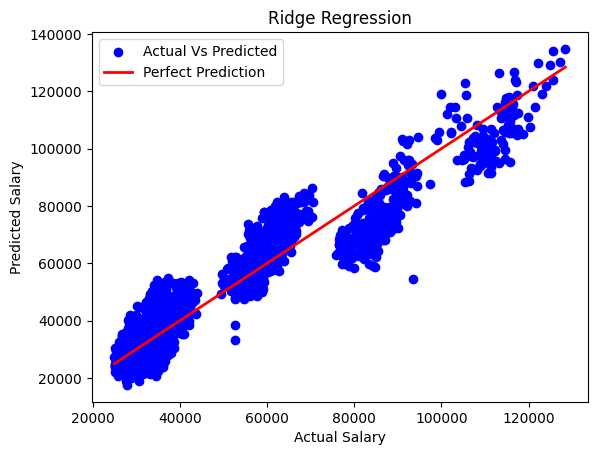

In [ ]:
plt.scatter(x = y_test,y = r_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression')
plt.legend()
plt.show()

4) Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

# Define alpha range and fit LassoCV
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(x_train, y_train)

print("Best alpha:", lasso_cv.alpha_)

# Predictions
lasso_predict_x_train = lasso_cv.predict(x_train)
lasso_predict_x_test = lasso_cv.predict(x_test)

# Training metrics
MSE_lasso_train = mean_squared_error(y_train, lasso_predict_x_train)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
MAE_lasso_train = mean_absolute_error(y_train, lasso_predict_x_train)
r2_score_lasso_train = r2_score(y_train, lasso_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_lasso_train)
print("MSE  :-", MSE_lasso_train)
print("RMSE :-", RMSE_lasso_train)
print("R2 Score Train :-", r2_score_lasso_train)

# Testing metrics
MSE_lasso_test = mean_squared_error(y_test, lasso_predict_x_test)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)
MAE_lasso_test = mean_absolute_error(y_test, lasso_predict_x_test)
r2_score_lasso_test = r2_score(y_test, lasso_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_lasso_test)
print("MSE  :-", MSE_lasso_test)
print("RMSE :-", RMSE_lasso_test)
print("R2 Score Test :-", r2_score_lasso_test)


Best alpha: 10.0

For Training :-
MAE  :- 6609.089212519914
MSE  :- 69737961.7361569
RMSE :- 8350.925801140667
R2 Score Train :- 0.898255533862172

For Testing :-
MAE  :- 6586.404273959699
MSE  :- 66846644.70626462
RMSE :- 8175.979739839417
R2 Score Test :- 0.9010550684458483


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains about 90% of the variance in the data. The MAE (6609) and RMSE (8174) are very close between training and testing, which shows the model generalizes well and is not overfitting. With alpha = 10, Lasso Regression provides strong predictive accuracy while also performing feature selection by shrinking less important coefficients.

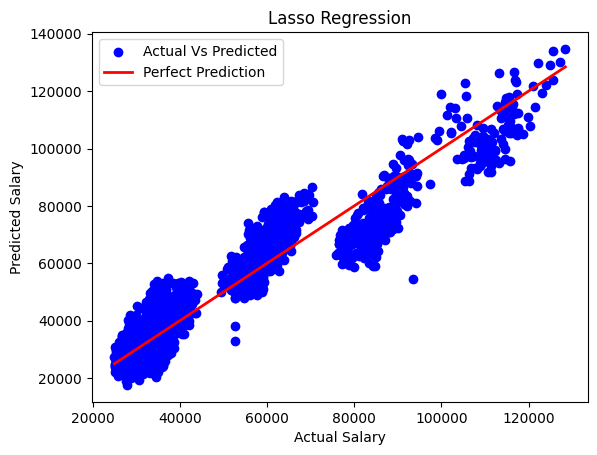

In [ ]:
plt.scatter(x = y_test,y = lasso_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Lasso Regression')
plt.legend()
plt.show()

5) Elasticnet Regression(L1+L2)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# Train ElasticNet Regression
EN = ElasticNet(alpha=10, l1_ratio=0.1, random_state=42)
EN.fit(x_train, y_train)

# Predictions
EN_predict_x_train = EN.predict(x_train)
EN_predict_x_test = EN.predict(x_test)

# Training metrics
MSE_EN_train = mean_squared_error(y_train, EN_predict_x_train)
RMSE_EN_train = root_mean_squared_error(y_train, EN_predict_x_train)
MAE_EN_train = mean_absolute_error(y_train, EN_predict_x_train)
r2_score_EN_train = r2_score(y_train, EN_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_EN_train)
print("MSE  :-", MSE_EN_train)
print("RMSE :-", RMSE_EN_train)
print("R2 Score Train :-", r2_score_EN_train)

# Testing metrics
MSE_EN_test = mean_squared_error(y_test, EN_predict_x_test)
RMSE_EN_test = root_mean_squared_error(y_test, EN_predict_x_test)
MAE_EN_test = mean_absolute_error(y_test, EN_predict_x_test)
r2_score_EN_test = r2_score(y_test, EN_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_EN_test)
print("MSE  :-", MSE_EN_test)
print("RMSE :-", RMSE_EN_test)
print("R2 Score Test :-", r2_score_EN_test)


For Training :-
MAE  :- 8737.239855465143
MSE  :- 119676406.99207835
RMSE :- 10939.671246983538
R2 Score Train :- 0.8253976480590292

For Testing :-
MAE  :- 8408.309821321836
MSE  :- 113048192.09789224
RMSE :- 10632.412336713256
R2 Score Test :- 0.8326685553388997


The ElasticNet model explains about 82–83% of the variation in the data, which shows good predictive performance. The training and testing errors (MAE and RMSE) are very close, indicating that the model generalizes well and is not overfitting.

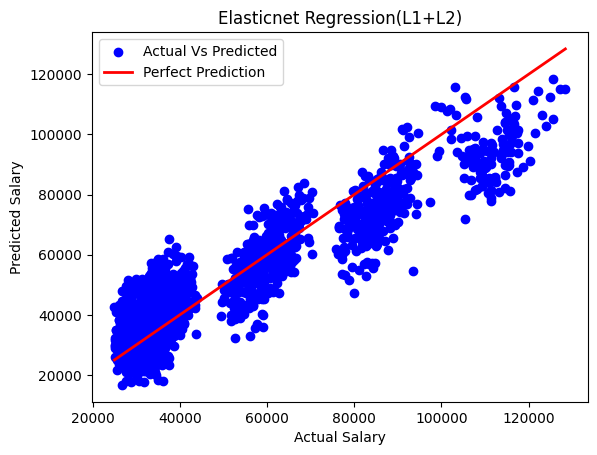

In [ ]:
plt.scatter(x = y_test,y = EN_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title("Elasticnet Regression(L1+L2)")
plt.legend()
plt.show()

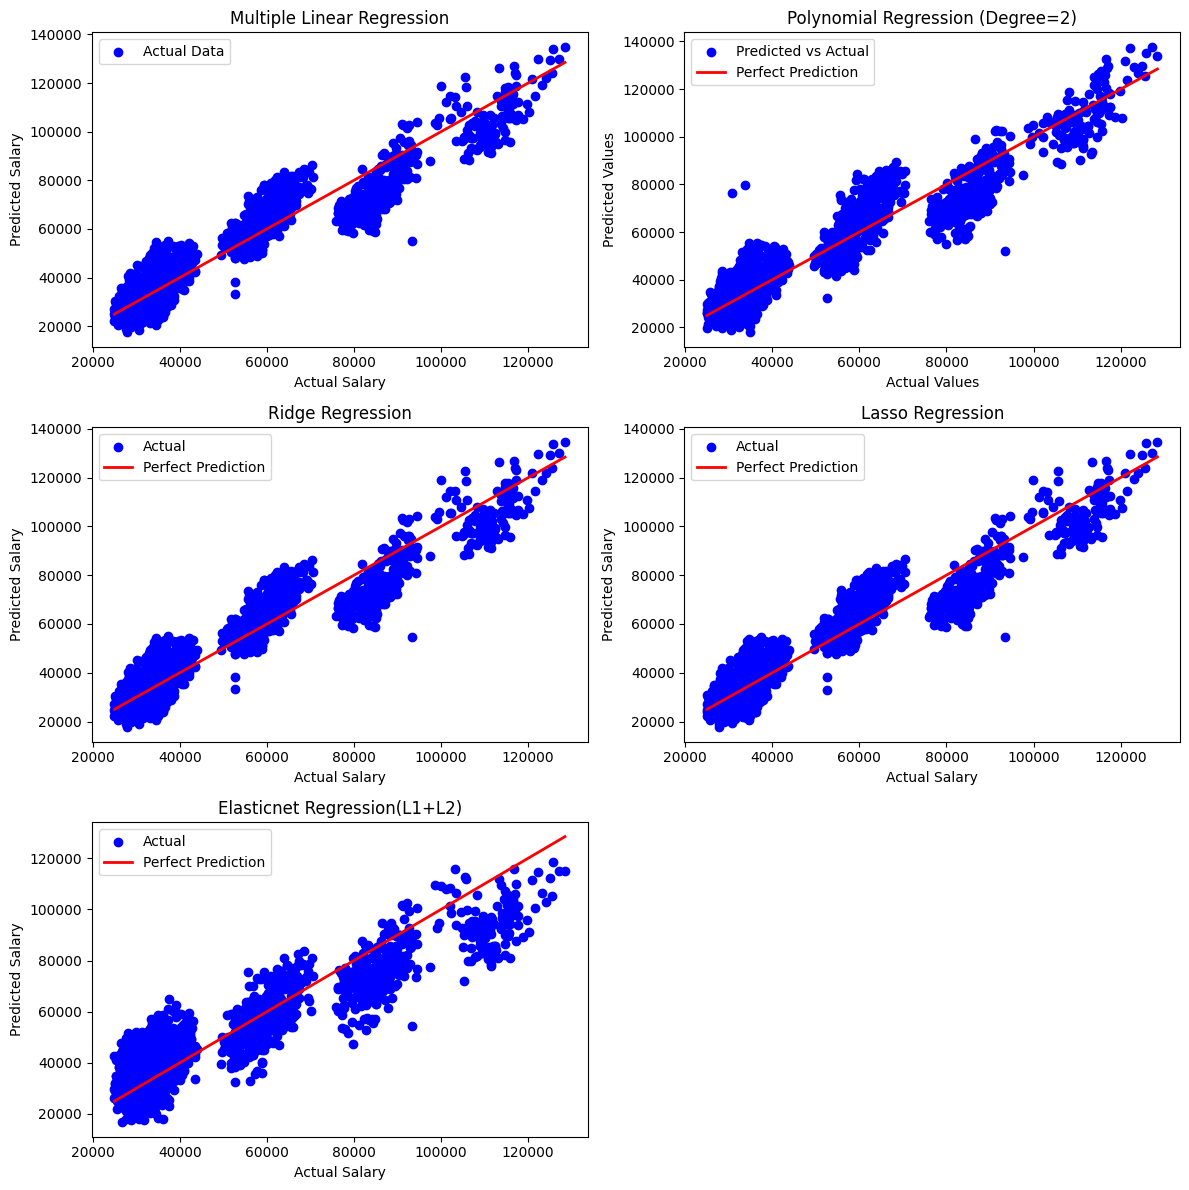

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Actual Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Multiple Linear Regression')
plt.legend()

plt.subplot(3,2,2)
plt.scatter(y_test, y_pred_poly_test, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()

plt.subplot(3,2,3)
plt.scatter(y_test,r_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(3,2,4)
plt.scatter(x = y_test,y = lasso_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Lasso Regression')
plt.legend()

plt.subplot(3,2,5)
plt.scatter(x = y_test,y = EN_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title("Elasticnet Regression(L1+L2)")
plt.legend()

plt.tight_layout()
plt.show()

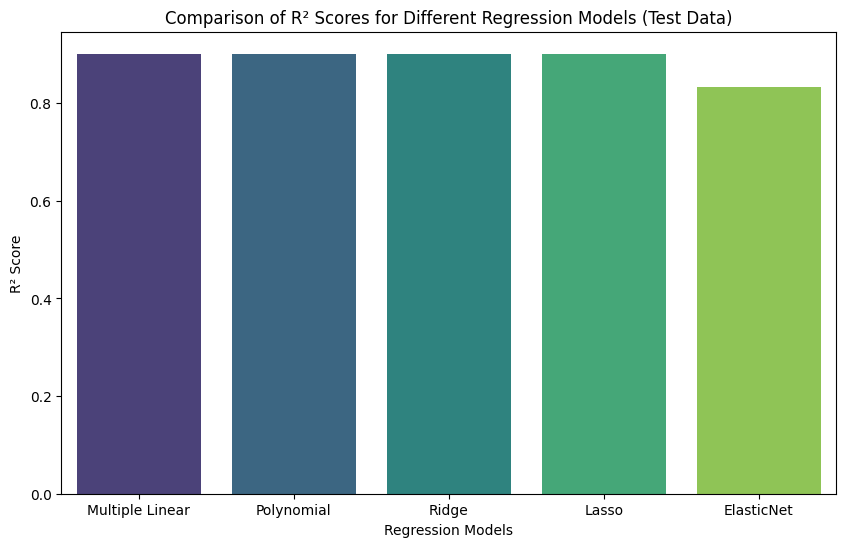

In [ ]:
models = ["Multiple Linear", "Polynomial", "Ridge", "Lasso", "ElasticNet"]

scores = [r2_score_test, r2_score_poly_test, r2_score_rid_test, r2_score_lasso_test, r2_score_EN_test]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=scores, palette="viridis")

plt.title("Comparison of R² Scores for Different Regression Models (Test Data)")
plt.xlabel("Regression Models")
plt.ylabel("R² Score")

plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': ['Multiple Linear Regression',
              'Polynomial Regression',
              'Lasso Regression',
              'Ridge Regression',
              'ElasticNet Regression'],

    # Training metrics
    'Train MSE': [MSE_lr_train, MSE_poly_train, MSE_lasso_train, MSE_rid_train, MSE_EN_train],
    'Train RMSE': [RMSE_lr_train, RMSE_poly_train, RMSE_lasso_train, RMSE_rid_train, RMSE_EN_train],
    'Train MAE': [MAE_lr_train, MAE_poly_train, MAE_lasso_train, MAE_rid_train, MAE_EN_train],
    'Train R2 Score': [r2_score_train, r2_score_poly_train, r2_score_lasso_train, r2_score_rid_train, r2_score_EN_train],
}

data_test = {
    'Model': ['Multiple Linear Regression',
              'Polynomial Regression',
              'Lasso Regression',
              'Ridge Regression',
              'ElasticNet Regression'],

    'Test MSE': [MSE_lr_test, MSE_poly_test, MSE_lasso_test, MSE_rid_test, MSE_EN_test],
    'Test RMSE': [RMSE_lr_test, RMSE_poly_test, RMSE_lasso_test, RMSE_rid_test, RMSE_EN_test],
    'Test MAE': [MAE_lr_test, MAE_poly_test, MAE_lasso_test, MAE_rid_test, MAE_EN_test],
    'Test R2 Score': [r2_score_test, r2_score_poly_test, r2_score_lasso_test, r2_score_rid_test, r2_score_EN_test],
}

summary_df = pd.DataFrame(data)
summary_df_test = pd.DataFrame(data_test)

summary_df.head()

,Model,Train MSE,Train RMSE,Train MAE,Train R2 Score
0,Multiple Linear Regression,6.967738e+07,8347.297717,6610.382937,0.898344
1,Polynomial Regression,5.696256e+07,7547.354317,5828.555746,0.916894
2,Lasso Regression,6.973796e+07,8350.925801,6609.089213,0.898256
3,Ridge Regression,6.970291e+07,8348.826784,6607.552607,0.898307
4,ElasticNet Regression,1.196764e+08,10939.671247,8737.239855,0.825398


In [ ]:
summary_df_test.head()

,Model,Test MSE,Test RMSE,Test MAE,Test R2 Score
0,Multiple Linear Regression,6.703395e+07,8187.426354,6593.489191,0.900778
1,Polynomial Regression,6.699918e+07,8185.302978,6301.175322,0.900829
2,Lasso Regression,6.684664e+07,8175.979740,6586.404274,0.901055
3,Ridge Regression,6.687321e+07,8177.603997,6584.047219,0.901016
4,ElasticNet Regression,1.130482e+08,10632.412337,8408.309821,0.832669


Model Prediction for New Employee Profile

In [ ]:
Age = 21
Gender = "Female"
Designation = "Junior"
ExperienceYears = 0
ProductivityScore = 65
EducationLevel = "Bachelor"
PerformanceRating = 4
LastPromotionYear = 2022
WorkLocation = "Delhi"
Department = "Finance"
Skillset = ["Finance", "Excel"]

# Transform
# Gender Val
gender_val = {"male": 1, "female": 0}[Gender.strip().lower()]

# Designation and EducationLevel (OrdinalEncoder)
des_edu_val = oe.transform([[Designation, EducationLevel]])[0].astype(int)

# WorkLocation + Department (OneHotEncoder)
work_dept_val = oh.transform([[WorkLocation, Department]])[0]

# Skillset (MultiLabelBinarizer)
skills_val = mlb.transform([Skillset])[0]

# Follow your training column order strictly
final_features = np.concatenate([
    [Age, gender_val, des_edu_val[0], ExperienceYears, ProductivityScore,
     des_edu_val[1], PerformanceRating, LastPromotionYear],
    work_dept_val,
    skills_val
]).reshape(1, -1)

print("Final feature count:", final_features.shape)

x_test_poly_transform = pl.transform(final_features)

prediction = lr.predict(final_features)
prediction_poly = poly.predict(x_test_poly_transform)
prediction_Ridge = R.predict(final_features)
prediction_Lasso = lasso_cv.predict(final_features)
prediction_Elasti = EN.predict(final_features)

print(f"Predicted Value Linear: {prediction[0]:.2f}")
print(f"Predicted Value Polynomial: {prediction_poly[0]:.2f}")
print(f"Predicted Value Ridge: {prediction_Ridge[0]:.2f}")
print(f"Predicted Value Lasso: {prediction_Lasso[0]:.2f}")
print(f"Predicted Value Elastinet: {prediction_Elasti[0]:.2f}")

Final feature count: (1, 40)
Predicted Value Linear: 27235.62
Predicted Value Polynomial: 25233.36
Predicted Value Ridge: 27111.07
Predicted Value Lasso: 26928.26
Predicted Value Elastinet: 33951.60


6) Cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=15)
print(scores)
print("Mean R2:", scores.mean())

[0.8885863  0.89534245 0.89778822 0.90275585 0.89803418 0.88166057
 0.89644419 0.90513955 0.89513464 0.90410394 0.89096624 0.89707462
 0.90467102 0.89800515 0.89661939]
Mean R2: 0.8968217550864698


# **Classification : Suggest suitable roles or Designation**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep X_classi as the original DataFrame
X_classi_df = df.drop(columns=["Designation"])
y_classi = df["Designation"]

selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X_classi_df, y_classi)

# Get top 3 feature names using the original DataFrame
top_3_features = X_classi_df.columns[selector.get_support()].tolist()
print("Top 3 selected features using f_classif:", top_3_features)

Top 3 selected features using f_classif: ['ExperienceYears', 'Salary', 'ProductivityScore']


In [ ]:
# Taking the top 3 features
X = df[['Salary','ExperienceYears','ProductivityScore']]
Y = df["Designation"]

# Train_Test Splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

1) Decision Tree

Decision Tree Training Accuracy: 0.9994011079502919
Decision Tree Testing Accuracy: 0.7089820359281437

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       472
           1       0.50      0.48      0.49       487
           2       1.00      1.00      1.00       269
           3       1.00      0.99      1.00       332
           4       0.99      1.00      1.00       110

    accuracy                           0.71      1670
   macro avg       0.80      0.80      0.80      1670
weighted avg       0.71      0.71      0.71      1670



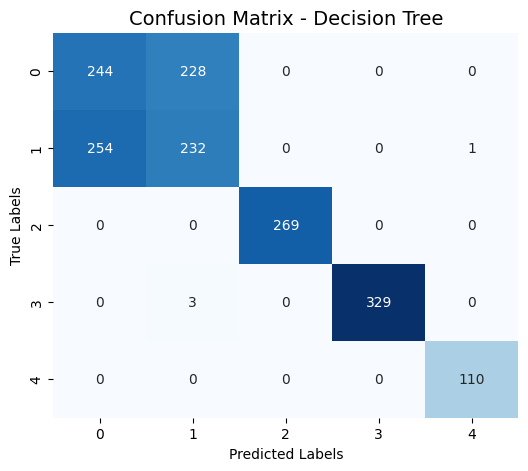

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train, Y_train)

Y_train_pred_dt1 = dt.predict(X_train)
Y_test_pred_dt1 = dt.predict(X_test)

# Accuracy
train_acc_dt1 = accuracy_score(Y_train, Y_train_pred_dt1)
test_acc_dt1 = accuracy_score(Y_test, Y_test_pred_dt1)

print(f"Decision Tree Training Accuracy: {train_acc_dt1}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt1}\n")

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) Training Accuracy ~ 99.94% - The model learned almost perfectly on the training data.
Testing Accuracy ~ 70.89% - Performance on unseen data is significantly lower.
This is a classic case of **overfitting**.

2) **Classes 0 & 1:** Poor precision and recall; the model struggles, likely due to overlap or being majority classes.
**Classes 2, 3 & 4:** Excellent performance;**Macro vs Weighted Avg:** Macro avg (0.80) shows average per-class performance, while weighted avg (0.71) drops because poor performance on the majority classes 0 & 1 lowers overall accuracy.

**2) Decision Tree (Hyperparametr tunning)**

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Training Accuracy: 0.7240604880970205
Decision Tree Testing Accuracy: 0.6976047904191617

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.31      0.06      0.10       472
           1       0.49      0.88      0.63       487
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00       332
           4       0.99      1.00      1.00       110

    accuracy                           0.70      1670
   macro avg       0.76      0.79      0.74      1670
weighted avg       0.66      0.70      0.64      1670



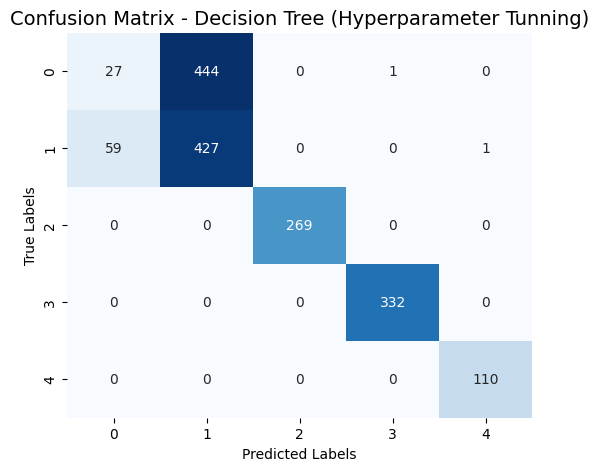

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
params = {
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold CV
grid_dt = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), param_grid=params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, Y_train)

print("Best Parameters:", grid_dt.best_params_)

# Predictions
Y_train_pred_dt2 = grid_dt.predict(X_train)
Y_test_pred_dt2 = grid_dt.predict(X_test)

train_acc_dt2 = accuracy_score(Y_train, Y_train_pred_dt2)
test_acc_dt2 = accuracy_score(Y_test, Y_test_pred_dt2)

# Accuracy
print(f"Decision Tree Training Accuracy: {train_acc_dt2}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt2}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt2))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt2 )

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree (Hyperparameter Tunning)", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) **Training vs Testing Accuracy:** 72.68% vs 69.76% - slight overfitting, better than untuned tree.

2) **Classes 0 & 1:** Low precision/recall → struggles with majority/overlapping classes.
**Classes 2, 3 & 4:** Near-perfect predictions → easier to separate or smaller classes.
**Macro avg (80%) vs Weighted avg (72%): **Majority classes lower weighted accuracy.

**3) Random Forest**

Random Forest Training Accuracy: 0.8633028896541398
Random Forest Testing Accuracy: 0.7107784431137725

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       472
           1       0.51      0.49      0.50       487
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00       332
           4       0.99      1.00      1.00       110

    accuracy                           0.71      1670
   macro avg       0.80      0.80      0.80      1670
weighted avg       0.71      0.71      0.71      1670



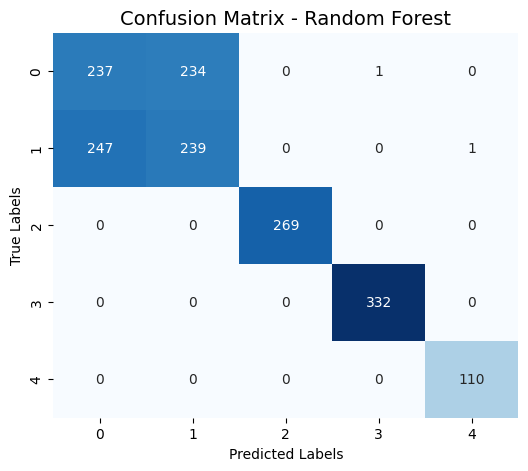

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

# Train Random Forest
rf_best = RandomForestClassifier(n_estimators=400,max_depth=10,min_samples_split=5,min_samples_leaf=2,random_state=42)
rf_best.fit(X_train, Y_train)

Y_train_pred_rf1 = rf_best.predict(X_train)
Y_test_pred_rf1 = rf_best.predict(X_test)

# Accuracy
train_acc_rf1 = accuracy_score(Y_train, Y_train_pred_rf1)
test_acc_rf1 = accuracy_score(Y_test, Y_test_pred_rf1)

print(f"Random Forest Training Accuracy: {train_acc_rf1}")
print(f"Random Forest Testing Accuracy: {test_acc_rf1}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_rf1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_rf1 )

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1)**Training vs Testing Accuracy:** 86.33% vs 71% → strong overfitting.

2)**Classes 0 & 1:** Low precision/recall - struggles with majority/
overlapping classes.
**Classes 2, 3 & 4:** Near-perfect - smaller or distinct classes predicted well.
*Macro avg (80%) vs Weighted avg (71%)* - poor performance on majority classes lowers overall accuracy.

**4) SVM**

SVM Training Accuracy: 0.7111843090282977
SVM Testing Accuracy: 0.7131736526946107

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       472
           1       0.51      1.00      0.67       487
           2       1.00      0.98      0.99       269
           3       0.99      1.00      1.00       332
           4       0.94      1.00      0.97       110

    accuracy                           0.71      1670
   macro avg       0.69      0.80      0.73      1670
weighted avg       0.57      0.71      0.62      1670



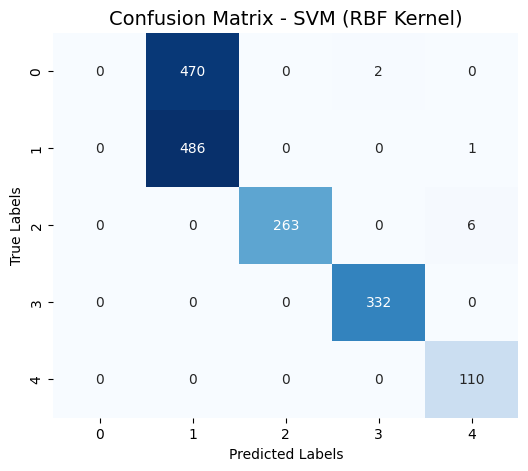

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = SVC(kernel='rbf',C=1.0)
clf.fit(X_train,Y_train)

Y_train_pred_clf1 = clf.predict(X_train)
Y_test_pred_clf1 = clf.predict(X_test)

# Accuracy
train_acc_clf1 = accuracy_score(Y_train, Y_train_pred_clf1)
test_acc_clf1 = accuracy_score(Y_test, Y_test_pred_clf1)

print(f"SVM Training Accuracy: {train_acc_clf1}")
print(f"SVM Testing Accuracy: {test_acc_clf1}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_clf1))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred_clf1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - SVM (RBF Kernel)", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) Training vs Testing Accuracy: 71.12% vs 71.31% → balanced generalization, no major overfitting.

2) Classes 0 & 1: Class 0 completely misclassified; Class 1 over-predicted with low precision but perfect recall. Classes 2, 3 & 4: near-perfect performance, well-separated data. Macro avg (80%) > Weighted avg (71%) → imbalance causes weaker overall accuracy.

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score


f1_weighted4 = f1_score(Y_test, Y_test_pred_clf1, average='weighted')
precision_score_weighted4 = precision_score(Y_test, Y_test_pred_clf1, average='weighted')
recall_weighted4 = recall_score(Y_test, Y_test_pred_clf1, average='weighted')

f1_weighted1 = f1_score(Y_test, Y_test_pred_dt1, average='weighted')
precision_score_weighted1 = precision_score(Y_test, Y_test_pred_dt1, average='weighted')
recall_weighted1 = recall_score(Y_test, Y_test_pred_dt1, average='weighted')

f1_weighted2 = f1_score(Y_test, Y_test_pred_dt2, average='weighted')
precision_score_weighted2 = precision_score(Y_test, Y_test_pred_dt2, average='weighted')
recall_weighted2 = recall_score(Y_test, Y_test_pred_dt2, average='weighted')

f1_weighted3 = f1_score(Y_test, Y_test_pred_rf1, average='weighted')
precision_score_weighted3 = precision_score(Y_test, Y_test_pred_rf1, average='weighted')
recall_weighted3 = recall_score(Y_test, Y_test_pred_rf1, average='weighted')



f1_weighted44 = f1_score(Y_train, Y_train_pred_clf1, average='weighted')
precision_score_weighted44 = precision_score(Y_train, Y_train_pred_clf1, average='weighted')
recall_weighted44 = recall_score(Y_train, Y_train_pred_clf1, average='weighted')

f1_weighted11 = f1_score(Y_train, Y_train_pred_dt1, average='weighted')
precision_score_weighted11 = precision_score(Y_train, Y_train_pred_dt1, average='weighted')
recall_weighted11 = recall_score(Y_train, Y_train_pred_dt1, average='weighted')

f1_weighted22 = f1_score(Y_train, Y_train_pred_dt2, average='weighted')
precision_score_weighted22 = precision_score(Y_train, Y_train_pred_dt2, average='weighted')
recall_weighted22 = recall_score(Y_train, Y_train_pred_dt2, average='weighted')

f1_weighted33 = f1_score(Y_train, Y_train_pred_rf1, average='weighted')
precision_score_weighted33 = precision_score(Y_train, Y_train_pred_rf1, average='weighted')
recall_weighted33 = recall_score(Y_train, Y_train_pred_rf1, average='weighted')

### **COMPARITIVE ANALYSIS OF CLASSIFICATION MODEL**

In [ ]:
data = {
    'Model': ['Decision Tree',
              'Decision Tree (Hyperparameter tunning)',
              'Random Forest',
              'SVM'],


    'Train Accuracy': [train_acc_dt1, train_acc_dt2, train_acc_rf1, train_acc_clf1],
    'Train F1': [f1_weighted11, f1_weighted22, f1_weighted33, f1_weighted44],
    'Train precision': [precision_score_weighted11, precision_score_weighted22, precision_score_weighted33, precision_score_weighted44],
    'Train Recall': [recall_weighted11, recall_weighted22, recall_weighted33, recall_weighted44],
}

data_test = {
    'Model': ['Decision Tree',
              'Decision Tree (Hyperparameter tunning)',
              'Random Forest',
              'SVM'],

    'Test Accuracy': [test_acc_dt1, test_acc_dt2, test_acc_rf1, test_acc_clf1],
    'Test F1': [f1_weighted1, f1_weighted2, f1_weighted3, f1_weighted4],
    'Test precision': [precision_score_weighted1, precision_score_weighted2, precision_score_weighted3, precision_score_weighted4],
    'Test Recall': [recall_weighted1, recall_weighted2, recall_weighted3, recall_weighted4],
}

summary_df = pd.DataFrame(data)
summary_df_test = pd.DataFrame(data_test)

summary_df

,Model,Train Accuracy,Train F1,Train precision,Train Recall
0,Decision Tree,0.999401,0.999401,0.999402,0.999401
1,Decision Tree (Hyperparameter tunning),0.724060,0.671228,0.738812,0.724060
2,Random Forest,0.863303,0.863125,0.863069,0.863303
3,SVM,0.711184,0.616219,0.567678,0.711184


In [ ]:
summary_df_test

,Model,Test Accuracy,Test F1,Test precision,Test Recall
0,Decision Tree,0.708982,0.709171,0.709758,0.708982
1,Decision Tree (Hyperparameter tunning),0.697605,0.635891,0.656255,0.697605
2,Random Forest,0.710778,0.710487,0.710305,0.710778
3,SVM,0.713174,0.617736,0.568866,0.713174


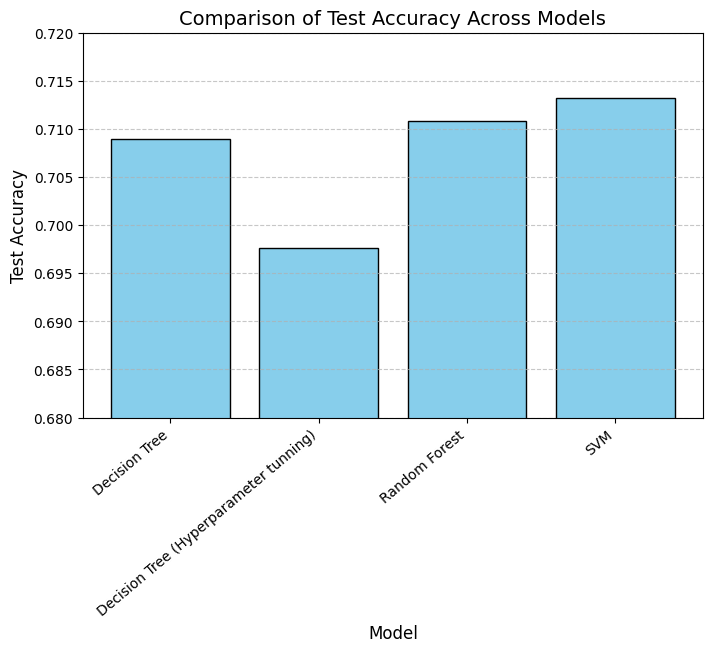

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ["Decision Tree",
          "Decision Tree (Hyperparameter tunning)",
          "Random Forest",
          "SVM"]

accuracies = [0.708982, 0.697605, 0.710778, 0.713174]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.title("Comparison of Test Accuracy Across Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(rotation=40, ha='right')
plt.ylim(0.68, 0.72)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Checking the Test Cases**

In [ ]:
import numpy as np

# Top features used for training
top_features = ['Salary','ExperienceYears','ProductivityScore']

designation_mapping = {0: 'Junior', 1: 'Executive', 2: 'Lead', 3: 'Senior', 4: 'Manager'}

#input test case
test_case = {
    'Salary': 60000,
    'ExperienceYears': 5,
    'ProductivityScore':75
}

# Convert input to array for prediction
user_input = np.array([test_case[feature] for feature in top_features]).reshape(1, -1)

# 1> model Decision Tree
pred1_encoded = dt.predict(user_input)[0]
pred1_label = designation_mapping[pred1_encoded]
print("Decision Tree")
print(f"Predicted encoded class: {pred1_encoded}")
print(f"Predicted Designation: {pred1_label}")

# 2> model Decision Tree (Hyperparameter Tunning)
pred2_encoded = grid_dt.predict(user_input)[0]
pred2_label = designation_mapping[pred2_encoded]
print("\nDecision Tree (Hyperparameter Tunning)")
print(f"Predicted encoded class: {pred2_encoded}")
print(f"Predicted Designation: {pred2_label}")

# 3> model Random Forest
pred3_encoded = rf_best.predict(user_input)[0]
pred3_label = designation_mapping[pred3_encoded]
print("\nRandom Forest")
print(f"Predicted encoded class: {pred3_encoded}")
print(f"Predicted Designation: {pred3_label}")

# 4> model SVM
pred4_encoded = clf.predict(user_input)[0]
pred4_label = designation_mapping[pred4_encoded]
print("\nSVM")
print(f"Predicted encoded class: {pred4_encoded}")
print(f"Predicted Designation: {pred4_label}")

Decision Tree
Predicted encoded class: 3
Predicted Designation: Senior

Decision Tree (Hyperparameter Tunning)
Predicted encoded class: 3
Predicted Designation: Senior

Random Forest
Predicted encoded class: 3
Predicted Designation: Senior

SVM
Predicted encoded class: 3
Predicted Designation: Senior


# **Clustering**

## 1.K-means clustering

In [ ]:
clu = df[['Age', 'Salary', 'ProductivityScore']]
clu.isna().sum()

,0
Age,0
Salary,0
ProductivityScore,0


In [ ]:
import plotly.express as px
fig = px.scatter_3d(clu, x='Age', y='Salary', z='ProductivityScore')
fig.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(clu)
  wcss.append(km.inertia_)

print(wcss)

[5706557900798.009, 1320879164645.987, 455421417641.2637, 176839286515.74323, 124798941919.565, 123393676046.46118, 82516286307.68506, 58962217516.28789, 45584604249.21471, 39521787390.86058]


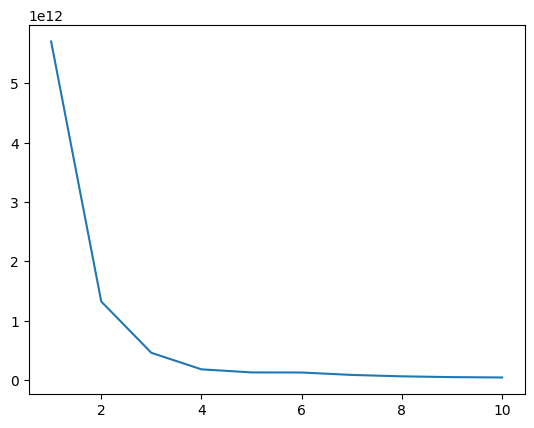

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clu)
y_predicted

array([0, 0, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
new_df = pd.DataFrame()
clu = df[['Age', 'Salary', 'ProductivityScore']]
new_df['Age'] = clu['Age']
new_df['Salary'] = clu['Salary']
new_df['ProductivityScore'] = clu['ProductivityScore']
new_df['labels'] = y_predicted
new_df.head()

,Age,Salary,ProductivityScore,labels
0,21,26918.0,65,0
1,38,30960.0,58,0
2,37,30858.0,54,0
3,29,43634.0,53,0
4,27,33096.0,43,0


In [ ]:
fig = px.scatter_3d(new_df, x='Age', y='Salary', z='ProductivityScore', color='labels')
fig.show()

Label 0 -> 30k-40k

Label 1 -> 80k-100k

Label 2 -> 50k-70k

Label 3 -> 25k-35k

In [ ]:
klm.inertia_
silhouette_score(clu, y_predicted)

np.float64(0.7780321073876547)

## **2.hierarchical clustering**

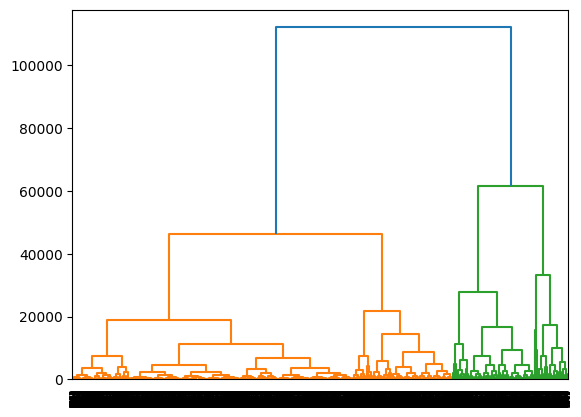

In [ ]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(clu, method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_=cluster.fit_predict(clu)

In [ ]:
fig = px.scatter_3d(x=clu['Age'], y=clu['Salary'], z=clu['ProductivityScore'], color=labels_)
fig.show()

## Evaluation

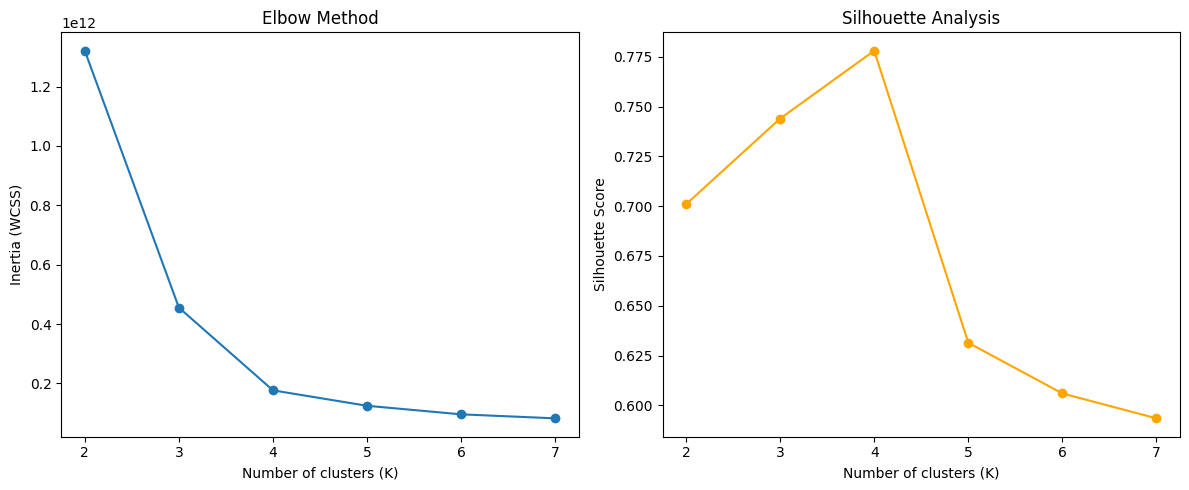

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clu)

    inertias.append(kmeans.inertia_)

    sil_scores.append(silhouette_score(clu, labels))


fig,axes = plt.subplots(1,2,figsize=(12,5))

# Plot Inertia (Elbow method)
axes[0].plot(K_range, inertias, marker='o')
axes[0].set_xlabel("Number of clusters (K)")
axes[0].set_ylabel("Inertia (WCSS)")
axes[0].set_title("Elbow Method")

# Plot Silhouette Scores
axes[1].plot(K_range, sil_scores, marker='o', color='orange')
axes[1].set_xlabel("Number of clusters (K)")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis") # should be above 0.6

plt.tight_layout()
plt.show()
